In [1]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# Exercise 1

In [2]:
#Import the data set "W06_training.txt“
df = pd.read_csv('W06_training.txt', delimiter=";")
df

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities,Fraud
0,2,1401,58.83,17,2,7,1,0
1,2,655,57.20,6,7,1,4,0
2,4,770,36.00,28,11,3,4,0
3,5,272,89.76,1,4,0,2,0
4,6,1511,8.75,15,0,7,4,0
...,...,...,...,...,...,...,...,...
299995,6,900,31.50,15,1,9,2,0
299996,4,1395,23.02,11,1,6,0,0
299997,4,131,87.75,27,1,3,0,0
299998,2,1724,95.33,20,10,8,3,0


In [3]:
#Use only the first 7 columns (i.e. ignore the „Fraud“ column for now)
y = df['Fraud']
df = df.drop(columns='Fraud')
df

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,2,1401,58.83,17,2,7,1
1,2,655,57.20,6,7,1,4
2,4,770,36.00,28,11,3,4
3,5,272,89.76,1,4,0,2
4,6,1511,8.75,15,0,7,4
...,...,...,...,...,...,...,...
299995,6,900,31.50,15,1,9,2
299996,4,1395,23.02,11,1,6,0
299997,4,131,87.75,27,1,3,0
299998,2,1724,95.33,20,10,8,3


In [4]:
#Divide each column by its maximum value, so that each each column is scaled between 0 and 1
df_scaled = df.apply(lambda x: x / x.max())
df_scaled

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,0.333333,0.729308,0.560713,0.566667,0.181818,0.7,0.2
1,0.333333,0.340968,0.545177,0.200000,0.636364,0.1,0.8
2,0.666667,0.400833,0.343119,0.933333,1.000000,0.3,0.8
3,0.833333,0.141593,0.855509,0.033333,0.363636,0.0,0.4
4,1.000000,0.786569,0.083397,0.500000,0.000000,0.7,0.8
...,...,...,...,...,...,...,...
299995,1.000000,0.468506,0.300229,0.500000,0.090909,0.9,0.4
299996,0.666667,0.726184,0.219405,0.366667,0.090909,0.6,0.0
299997,0.666667,0.068194,0.836352,0.900000,0.090909,0.3,0.0
299998,0.333333,0.897449,0.908597,0.666667,0.909091,0.8,0.6


In [5]:
#Perform a principal component analysis. Report the explained variance ratio and 
#the components of the first two principal components

pca = PCA()
pca.fit(df_scaled)
evr = pca.explained_variance_ratio_

In [6]:
pd.DataFrame(evr[:2], columns=['Explained variance ratio'], index=['1st', '2nd'])

,Explained variance ratio
1st,0.184881
2nd,0.158641


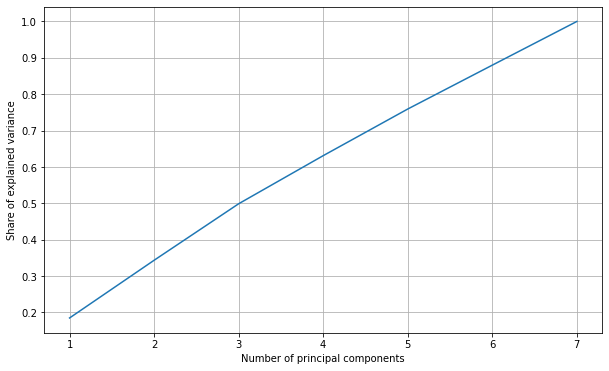

In [7]:
cum_explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),cum_explained)
plt.xlabel("Number of principal components")
plt.ylabel("Share of explained variance")
plt.grid()
plt.show()

In [8]:
print('Components of the first two principal components')
pd.DataFrame(pca.components_[:2], columns=df.columns, index=['1st', '2nd'])

Components of the first two principal components


,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
1st,-0.001364,0.000306,0.00272,-0.010662,0.002007,0.011759,0.999867
2nd,-0.013057,0.001897,-0.00708,0.018096,-0.168284,-0.985384,0.012120


In [9]:
#Perform a k-means cluster analysis to derive a solution with 3 clusters. 
#For comparison use KMeans(n_clusters=3, random_state=100) to always get the same results.
#Report the components of the cluster centers and the size of the clusters 
#(i.e. the number of data points assigned to each cluster)

model = KMeans(n_clusters=3, random_state=100)
model.fit(df_scaled)
labels = model.predict(df_scaled)
print(labels)


[1 0 0 ... 2 1 0]


In [10]:
centroids = model.cluster_centers_
print('Cluster centers')
pd.DataFrame(centroids, columns=df.columns)

Cluster centers


,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,0.583484,0.476233,0.476842,0.514624,0.503496,0.502306,0.846643
1,0.585983,0.476453,0.476744,0.516873,0.521093,0.791409,0.260811
2,0.582773,0.476715,0.476150,0.516977,0.472939,0.207929,0.265392


In [11]:
pd.Series(labels).value_counts().to_frame('Cluster Size')

,Cluster Size
0,121556
2,89542
1,88902


# Exercise 2 

In [90]:
#Get an overview and understanding of the available data
sum(y)

14328

Only 14328 out of 300000 are fraud - that is 4.776%.
We should get a similar percentage in the scoring data, assuming they have the same distibution

In [91]:
#Clean the data if necessary and derive new “smart” variables
#(e.g. scale the data or compute ratios of given variables) that can be used for the predictions

We use the scaled DataFrame from exercise 1

In [92]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_scaled, y, random_state=4, stratify=y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=40, stratify=y_train_val)

In [93]:
#Determine which characteristics are key characteristics as they are driving fraudulent behavior

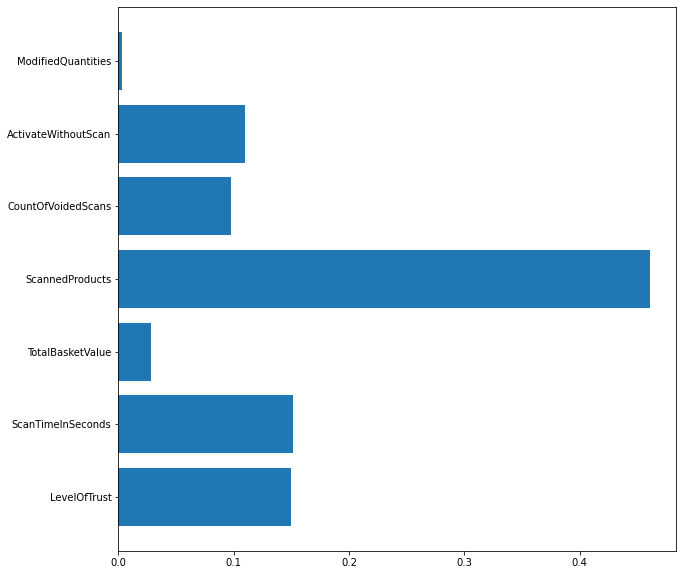

In [94]:
clf = DecisionTreeClassifier(random_state=40)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plt.barh(width=clf.feature_importances_,y=X_train_val.columns.values)
plt.show()

As we can see, if we fit a Decision Tree Classifier, the features with more importance are: ScannedProducts, LevelOfTrust and ScanTimeInSeconds

In [95]:
#Use the appropriate classification algorithms you are familiar with and make predictions. 
#If necessary, tune the parameters of the model

We try two different models: Logistic Regression and Random Forest

In [96]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)
print("Accuracy on training set: {:.5f}".format(logreg.score(X_train, y_train)))
print("Accuracy on validation set: {:.5f}".format(logreg.score(X_val, y_val)))
y_pred_train = logreg.predict(X_train)
print("f1 score on training set: {:.5f}".format(f1_score(y_train, y_pred_train)))
y_pred_val = logreg.predict(X_val)
print("f1 score on validation set: {:.5f}".format(f1_score(y_val, y_pred_val)))

Accuracy on training set: 0.99108
Accuracy on validation set: 0.99092
f1 score on training set: 0.90503
f1 score on validation set: 0.90305


In [97]:
cv_scores = cross_val_score(logreg, X_train_val, y_train_val, cv=5, scoring='f1')
print(cv_scores)
np.mean(cv_scores)

[0.90299685 0.90616941 0.90539206 0.89561091 0.90702236]


0.9034383182830974

In [98]:
forest = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=5, random_state=30, n_jobs=-1)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_val, y_val)))
y_pred_train = forest.predict(X_train)
print("f1 score on training set: {:.5f}".format(f1_score(y_train, y_pred_train)))
y_pred_val = forest.predict(X_val)
print("f1 score on validation set: {:.5f}".format(f1_score(y_val, y_pred_val)))

Accuracy on training set: 0.987
Accuracy on test set: 0.987
f1 score on training set: 0.86298
f1 score on validation set: 0.86416


In [99]:
cv_scores = cross_val_score(forest, X_train_val, y_train_val, cv=5, scoring='f1')
print(cv_scores)
np.mean(cv_scores)

[0.84091841 0.84892086 0.85485855 0.84623281 0.84598349]


0.8473828237050111

We can see that the Logistic Regression performs better, so we will do a gridsearch to find the best value for C, the inverse of regularization strength

In [100]:
c_space = np.logspace(-5, 5, 11)
c_space

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])

In [101]:
param_grid = {'C': c_space}
logreg2 = LogisticRegression()
logreg_cv = GridSearchCV(logreg2, param_grid, cv=5, scoring='f1')
logreg_cv.fit(X_train_val, y_train_val)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 100.0}
Best score is 0.9063409895170171


In [102]:
best_logreg = logreg_cv.best_estimator_

In [103]:
#Measure the quality of the model or compare the quality of the models and choose a final model

Let's compare the confusion matrix for the Logistic Regression with the default value of C, and the one we found doing the gridsearch

In [104]:
print('Confusion Matrix for the Logistic Regression with the default value of C (C=1)')
print(confusion_matrix(y_val, logreg.predict(X_val)))

Confusion Matrix for the Logistic Regression with the default value of C (C=1)
[[64032   244]
 [  369  2855]]


In [105]:
print('Confusion Matrix for the Logistic Regression with the value of C from the gridsearch (C=100)')
print(confusion_matrix(y_val, best_logreg.predict(X_val)))

Confusion Matrix for the Logistic Regression with the value of C from the gridsearch (C=100)
[[64003   273]
 [  328  2896]]


So, although with C=100 we get a higher F1 score, in this particular case we are interested in minimizing the false positives, since they are penalized with a loss of 25 EUR for the supermarket. And we can see that with C=100 we get a higher number of false positives than with C=1. Therefore we're going to define our own metric, based on the gains and losses for each case and use gridsearch again to find the C that maximizes that metric

In [106]:
#Use statistical key figures, but especially the total costs or the total revenue

In [107]:
def revenue(y_true, y_pred):
    M = confusion_matrix(y_true, y_pred)
    return (M[0,1]*(-25) + M[1,0]*(-5) + M[1,1]*(5))/(M[0,0] + M[0,1] + M[1,0] + M[1,1])

revenue_scorer = make_scorer(revenue)

In [108]:
print("If we didn't make any prediction mistakes, the score with this new metric would be:", revenue(y_train_val, y_train_val))

If we didn't make any prediction mistakes, the score with this new metric would be: 0.23879629629629628


In [109]:
c_space = np.logspace(-5, 5, 11)
param_grid = {'C': c_space}

logreg3 = LogisticRegression()
logreg_cv_custom = GridSearchCV(logreg3, param_grid, cv=5, scoring=revenue_scorer)
logreg_cv_custom.fit(X_train_val, y_train_val)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv_custom.best_params_)) 
print("Best score is {}".format(logreg_cv_custom.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.10564814814814816


In [110]:
best_logreg_custom = logreg_cv_custom.best_estimator_

Results on the test set:

In [111]:
M = [[f1_score(y_test, best_logreg.predict(X_test)), f1_score(y_test, best_logreg_custom.predict(X_test))],
     [revenue(y_test, best_logreg.predict(X_test)), revenue(y_test, best_logreg_custom.predict(X_test))]]
pd.DataFrame(M, columns=['C=100', 'C=0.1'], index=['F1', 'Revenue'])

,C=100,C=0.1
F1,0.911994,0.883234
Revenue,0.106167,0.105333


In [112]:
#Hand-in your fraud predictions (0/1) for each of the 100,000 cases of the scoring dataset
scoring = pd.read_csv('W06_scoring.txt', delimiter=";")
scoring

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,2,202,76.39,16,10,0,5
1,3,165,3.55,9,3,8,3
2,3,1601,57.11,6,1,6,4
3,3,571,22.73,14,4,7,4
4,6,288,53.36,3,5,1,3
...,...,...,...,...,...,...,...
99995,1,1142,2.36,11,3,7,1
99996,5,1276,34.76,7,6,2,4
99997,4,540,52.79,12,10,0,5
99998,3,1195,39.40,24,0,0,2


In [113]:
scoring_scaled = scoring.apply(lambda x: x / x.max())
scoring_scaled

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,0.333333,0.105208,0.728495,0.533333,0.909091,0.0,1.0
1,0.500000,0.085938,0.033855,0.300000,0.272727,0.8,0.6
2,0.500000,0.833854,0.544631,0.200000,0.090909,0.6,0.8
3,0.500000,0.297396,0.216765,0.466667,0.363636,0.7,0.8
4,1.000000,0.150000,0.508869,0.100000,0.454545,0.1,0.6
...,...,...,...,...,...,...,...
99995,0.166667,0.594792,0.022506,0.366667,0.272727,0.7,0.2
99996,0.833333,0.664583,0.331490,0.233333,0.545455,0.2,0.8
99997,0.666667,0.281250,0.503433,0.400000,0.909091,0.0,1.0
99998,0.500000,0.622396,0.375739,0.800000,0.000000,0.0,0.4


In [114]:
fraud_prediction = best_logreg_custom.predict(scoring_scaled)
sum(fraud_prediction)

4194

**Observation**: The number of incorrect labeled samples is probably a bit higher using C=0.1 than C=100, but we decided to optimize the revenue and not the F1 score.

In [115]:
fraud_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)